In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv')

dfi = df.set_index('PassengerId')

In [3]:
dfi.shape

(891, 11)

In [4]:
dfi.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dfi.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#Write a program that calculates the number of surviving passengers and prints it to the screen.

surv = dfi[dfi['Survived'] == 1].count()
surv.head(1)

Survived    342
dtype: int64

In [8]:
firstc = dfi[['Pclass', 'Survived']]
firstc_t = firstc[firstc['Pclass'] == 1]

t = firstc_t['Pclass'].value_counts()
f = firstc_t[firstc_t['Survived'] == 1]

perc = f['Survived'].value_counts() * 100 / t
perc

1    62.962963
dtype: float64

Text(0.5, 0, '63 % of first class passengers survived')

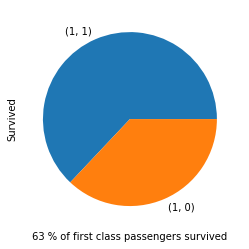

In [9]:
firstc_t.groupby('Pclass')['Survived'].value_counts().plot.pie()
plt.xlabel("63 % of first class passengers survived")

In [10]:
dfi['Age'].mean()

29.69911764705882

In [11]:
del dfi['Embarked']
del dfi['Cabin']
dfi1 = dfi.dropna()

In [12]:
dfi1.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [13]:
dfi.reset_index(inplace=True)
dfi.set_index(['Survived'], inplace=True)
dfi['Age'].fillna({0:30.6, 1:28.3}, inplace=True)

Text(0.5, 1.0, 'surviving/dead passengers separated by class and gender')

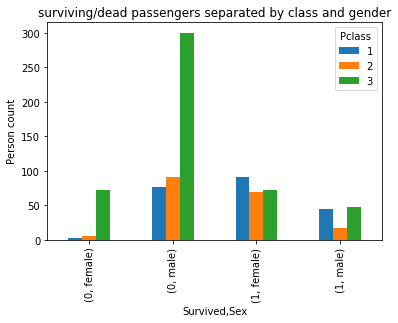

In [14]:
dfi.reset_index(inplace=True)
dfi.groupby(['Survived', 'Sex'])['Pclass'].value_counts().unstack().plot.bar()
plt.ylabel("Person count")
plt.title("surviving/dead passengers separated by class and gender")

# Feature Engineering

* normalizing --	de-mean, scale or otherwise transform features

* scaling 	-- shift the mean and standard deviation

* imputation 	-- fill missing values

* one-hot encoding 	-- convert categories to binary columns

* add features -- 	add extra polynomial or combined features

* feature selection --	decide which features to use

In [15]:
dfi.set_index('PassengerId', inplace=True)

Columns = Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'

binary (hot coding) - Sex, Pclass, SibSP, Parch

normalizing - Fare, Age

In [16]:
dfi['Sex_bin'] = [1 if x =='male' else 0 for x in df['Sex']]

In [17]:
del dfi['Sex']
del dfi['Ticket']

In [18]:
Pc = dfi['Pclass']
Pclass_bin = pd.get_dummies(Pc)
Pclass_bin.columns = ['Pclass1', 'Pclass2', 'Pclass3']
dfi = pd.concat([dfi, Pclass_bin], axis=1)
del dfi['Pclass']

In [19]:
# m = StandardScaler()
# Xt = m.fit_transform(m)

In [20]:
dfi['Age'] = dfi['Age'].apply(lambda x: x / 26501.77)

In [21]:
dfi['Fare'] = dfi['Fare'].apply(lambda x: x / 28693.9493)

In [24]:
Parch = dfi['Parch'].values
SibSp = dfi['SibSp'].values

dfi['family'] = (list(zip(Parch, SibSp)))

In [ ]:
#dfi['family'] = 

In [23]:
#dfi['family'] = pd.DataFrame(Parch, SibSp)
#m = PolynomialFeatures(interaction_only=True)
#m.fit_transform(dfi['family'])

ValueError: cannot reindex from a duplicate axis

# Logistic Regression

* sigmoid function --	function rapidly changing from 0 to 1
* coefficients --	model parameters in the linear part
* log probability --	result of the logistic function
* threshold value --	probability at which a positive prediction is made (default 0.5)
* log loss --	error function to be optimized
* one-vs-rest --	strategy for multinomial regression
* softmax --	error function for multinomial regression